# MAD4401 - Project 1

Consider the problem of finding the roots of the following function:

$$f(x) = \frac{1}{100}(4x^4-44x^3+61x^2+270x-525).$$

---

## Problem 1

Graph the function on the interval $[-3,9]$. Include the graph and the code used to generate the graph in your write-up and answer the following questions based on the graph. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import math
import sympy as sp
#from IPython.display import display, Math

In [20]:
# implementation of function f
def f(x):
    return (1/100)*(4*math.pow(x,4) - (44*math.pow(x,3)) + (61*math.pow(x,2))
            + (270*x) - 525)

In [3]:
# implementation of f'
def fp(x):
    return (1/100)*(16*math.pow(x,3))-(132*math.pow(x,2)) + (122*x) + 270

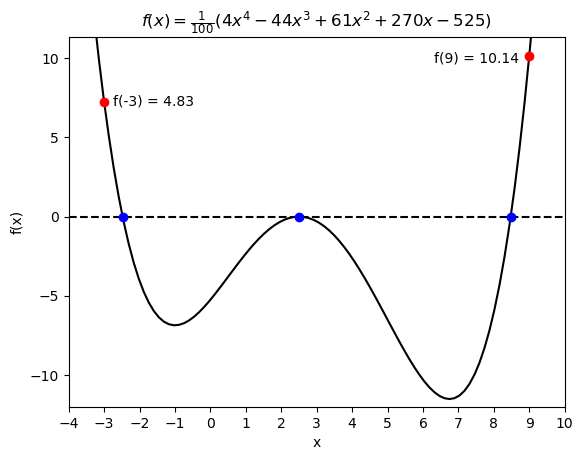

In [4]:
# graph f(x) on [-3,9]
x = np.linspace(-4, 10, 100)    # generate 1000 evenly spaced points on (-10,10) 
vf = np.vectorize(f)    # create vectorized implementation of this function 

# plot graphic 
plt.plot(x, vf(x), 'k')    
plt.plot([-4,10], [0,0], 'k--')    
plt.axis([-4, 10, -12 , f(9.05)]);   


# other plot asthetics 
plt.title(r'$f(x) = \frac{1}{100}(4x^4-44x^3+61x^2+270x-525)$')
plt.xlabel('x')
plt.ylabel('f(x)');

# plot points of interest 
plt.plot(-3, f(-3), 'ro')
plt.text(-2.75, 7, r'f(-3) = 4.83')    
plt.plot(9, f(9),'ro')
plt.text(6.3, 9.75, r'f(9) = 10.14')  
plt.plot(-2.477, f(-2.477), 'bo')
plt.plot(2.5, f(2.5), 'bo')
plt.plot(8.477, f(8.477), 'bo')

# adjust ticks
plt.xticks(np.arange(-4,11,1));

<br>
(a) From the graph of $f$, we see that $f$ has a root on the interval $[-3,-2]$. Will the bisection method starting with the interval $[-3,-2]$ converge to this root? Why or why not? 

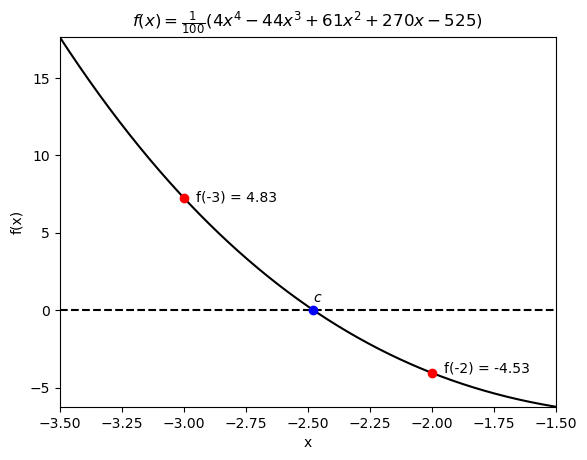

In [22]:
# narrow graph to specified interval of [-3,-2]
x = np.linspace(-3.5, -1.5, 1000)    # generate 1000 points
vf = np.vectorize(f)    # create vectorized implementation of this function 

plt.plot(x, vf(x), 'k')    # plot vf(x) vs x
plt.plot([-3.5,-1.5], [0,0], 'k--')    # plot horizontal line across 
plt.axis([-3.5,-1.5, f(-1.5), f(-3.5)]);   # adjust axes to fit only interval

# other plot asthetics 
plt.title(r'$f(x) = \frac{1}{100}(4x^4-44x^3+61x^2+270x-525)$')
plt.xlabel('x')
plt.ylabel('f(x)');

# points of interest 
plt.plot(-3, f(-3), 'ro')
plt.text(-2.95, 7, r'f(-3) = 4.83')
plt.plot(-2, f(-2), 'ro')
plt.text(-1.95, -4, r'f(-2) = -4.53');
plt.plot(-2.477, f(-2.477), 'bo');
plt.text(-2.477, 0.5, r'$c$');

<br>Based on the graph above, the bisection method will converge to the root on $[-3,-2]$. 
Observe $f \in C[-3,-2]$ and $f(-3)f(-2)<0$.
Thus by the Intermediate Value Theorem, $\exists c \in [-3,-2] \ni f(c)=0$.
Also, by inspection there only exists one root in this interval. 
Therefore, the bisection method will converge to this root, $c$. 

<br>
(b) From the graph of $f$ we see that $f$ has a root on the interval $[2,3]$. Will the bisection method starting with the interval $[2,3]$ converge to this root? Why or why not?

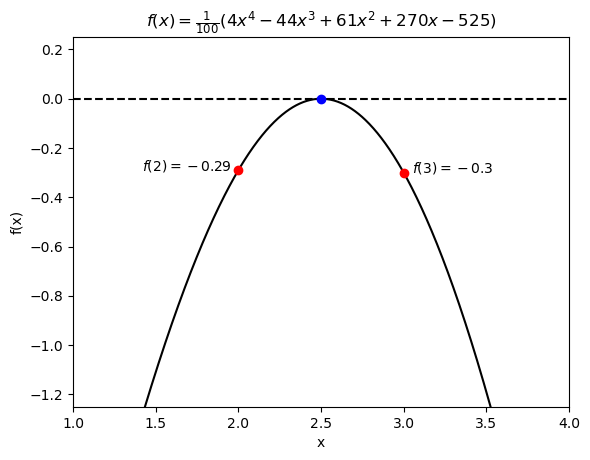

In [6]:
# narrow graph to specified interval of [-2,-3]

x = np.linspace(1, 4, 1000)    # generate 1000 evenly spaced points on (-10,10) 
vf = np.vectorize(f)    # create vectorized implementation of this function 

plt.plot(x, vf(x), 'k')    # plot vf(x) vs x
plt.plot([1, 4], [0,0], 'k--')    # plot horizontal line across 
plt.axis([1, 4, -1.25, 0.25]);   # adjust axes to fit only interval

# other plot asthetics 
plt.title(r'$f(x) = \frac{1}{100}(4x^4-44x^3+61x^2+270x-525)$')
plt.xlabel('x')
plt.ylabel('f(x)');

# points of interest 
plt.plot(2, f(2), 'ro')
plt.text(1.42, f(2), r'$f(2) = -0.29$')
plt.plot(3, f(3), 'ro')
plt.text(3.05, f(3), r'$f(3) = -0.3$')
plt.plot(2.5, f(2.5), 'bo');

<br>While there is a unique root in this interval, the Intermediate Value Theorem doesn't hold. The function $f$ does not change sign over the given interval, therefore the bisection method will not converge. 

<br>
(c) For the root on the interval $[-3,-2]$, do you expect linear or quadratic convergence of Newton's method? Why? 

<br>For the root on $[-3,-2]$, I expect quadratic convergence using Newton's Method because the root is a simple root and is the only one within the interval.

<br>
(d) For the root on the interval $[2,3]$, do you expect linear or quadratic convergence of Newton's method? Why?

<br>For the root on the interval $[2,3]$, I expect the root should converge linearly. This is because the root is of multiplicity 2 (i.e. a double root), thus the Newton method will not converge quadratically. 


--- 

## Problem 2

Create you own code to implement the bisection method. Include the code in your write-up and perform the following tasks. 

(a) Apply the bisection method starting with the interval $[-3,-2]$ to find the root with accuracy $10^{-5}$. 

In [52]:
# Bisection Method
def bisection(func, a, b, *, tol = None, maxiter = None):
    '''
    Function accepts as input a function f that implements f(x), the endpoints
    a and b of an interval [a,b]. Function allows for Bisection method 
    implementation using only a maximum number of iterations,
    a maximum absolute error tolerance, or the option to use 
    both as potential stopping points for execution. No return value, 
    function prints to standard out the number of iterations,
    a, b, current approximation, and absolute error.
    '''
    if (f(a)*f(b)>0):    # ensure IVT holds before executing function 
        raise ValueError(f"Error: f(x) does not change signs on [{a},{b}] "
                         f"or more than one root exists in [{a},{b}].")
    counter = 0
    fa = func(a)
    p = a + (b-a)/2 
    l = a
    u = b
    print(f"n\ta\t\t\tb\t\t\t\tpn (midpoint)\t\t\t\tAbs. Error")
    print("_"*120)
    if (tol and maxiter == None):    # executed if no max iteration entered
        while True:
            p = a + (b-a)/2
            fp = func(p)
            if (fp == 0) or ((b-a)/2 < tol):    # exit condition
                counter += 1
                print(f"{counter:>02}\t{a:<16}\t{b:<16}\t\t{p:<16}\t\t\t"
                      "{b-p:<16}")
                break
            elif (fa * fp > 0):    # same signs, shift right
                print(f"{counter+1:>02}\t{a:<16}\t{b:<16}\t\t{p:<16}\t\t\t"
                      f"{b-p:<16}")
                a = p
                fa = fp
            else:    # different signs, shift left
                print(f"{counter+1:>02}\t{a:<16}\t{b:<16}\t\t{p:<16}\t\t\t"
                      f"{b-p:<16}")
                b = p
            counter += 1
        print(f"\nAfter {counter} iterations, the approximation for the root"
              f" in [{l},{u}] is ~ {p}\nwith error {b-p}")
    elif (maxiter and tol == None):    # tolerance only
        while counter < maxiter:
            p = a + (b-a)/2
            fp = func(p)
            if (fa * fp > 0):    # same signs, shift right
            
                print(f"{counter+1:>02}\t{a:<16}\t{b:<16}\t\t{p:<16}\t\t\t"
                      "{b-p:<16}")
                a = p
                fa = fp
            else:    # different signs, shift left
                print(f"{counter+1:>02}\t{a:<16}\t{b:<16}\t\t{p:<16}\t\t\t"
                      f"{b-p:<16}")
                b = p
            counter += 1
        print(f"\nAfter {counter} iterations, the approximation for the root"
              f" in [{l},{u}] is ~ {p}\nwith error {b-p}")
    else:    # max iterations and error tolerance
        while counter < maxiter:
            p = a + (b-a)/2
            fp = func(p)
            if (fp == 0) or ((b-a)/2 < tol): 
                counter += 1
                print(f"{counter:>02}\t{a:<16}\t{b:<16}\t\t{p:<16}\t\t\t"
                      f"{b-p:<16}")
                break
            if (fa * fp > 0):    # same signs, shift right
            
                print(f"{counter+1:>02}\t{a:<16}\t{b:<16}\t\t{p:<16}\t\t\t"
                      f"{b-p:<16}")
                a = p
                fa = fp
            else:    # different signs, shift left
                print(f"{counter+1:>02}\t{a:<16}\t{b:<16}\t\t{p:<16}\t\t\t"
                      f"{b-p:<16}")
                b = p
            counter += 1
        print(f"\nAfter {counter} iterations, the approximation for the root in"
              f" [{l},{u}] is ~ {p}\nwith error {b-p}")

In [53]:
# apply bisection method to [-3,-2] with accuracy 10^-5
try:
    bisection(f,-3,-2,tol=0.00001)
except ValueError as err:
    print(err)

n	a			b				pn (midpoint)				Abs. Error
________________________________________________________________________________________________________________________
01	-3              	-2              		-2.5            			0.5             
02	-2.5            	-2              		-2.25           			0.25            
03	-2.5            	-2.25           		-2.375          			0.125           
04	-2.5            	-2.375          		-2.4375         			0.0625          
05	-2.5            	-2.4375         		-2.46875        			0.03125         
06	-2.5            	-2.46875        		-2.484375       			0.015625        
07	-2.484375       	-2.46875        		-2.4765625      			0.0078125       
08	-2.484375       	-2.4765625      		-2.48046875     			0.00390625      
09	-2.48046875     	-2.4765625      		-2.478515625    			0.001953125     
10	-2.478515625    	-2.4765625      		-2.4775390625   			0.0009765625    
11	-2.4775390625   	-2.4765625      		-2.47705078125  			0.00048828125   
12	-2.4775390625   	-2.477

In [43]:
# attempt to find root on interval where root doesn't change sign
try:
    bisection(f,-4,-3,tol=0.00001)
except ValueError as err:
    print(err)

Error: f(x) does not change signs on [-4,-3] or more than one root exists in [-4,-3].


<br>(b) Record the data from the bisection method in a table of the given form.

**TODO:** Simply copy the contents of the output above to a LaTeX table for the write-up. 

---

## Question 3 

Create your own code to implement Newton's Method. Include the code in the write-up and perform the following tasks. 

In [62]:
# Newton's Method Implementation 
def newtonMethod(func, p0, *, error = None, maxiter = None):
    '''
    Implementation of Netwon's method for approximating roots of continous
    functions. Function takes as arguments the implementation of a 
    mathematical function, the initial guess for the approximation of the root,
    and optionally as keyword arguments the absolute error tolerance and/or 
    the maximum number of iterations to perform. Function prints out number of
    iterations, the nth approximation of the root and the absolute error of 
    the nth iteration. Function also return a vector containing the sequence
    of approximations.
    '''
    x = sp.symbols('x')
    counter = 0 
    func_diff = sp.Derivative(func, x)    # compute derivative
    approxs = np.array([p0], dtype=np.longdouble)   # approximations array
    if (error and maxiter == None):    # Absolute error only as exit condition
        print("N\tPn\t\t\tAbs. Err.")
        print("_"*60)
        while True:
            counter += 1
            p = p0 - (func.subs(x,p0)/func_diff.doit_numerically(p0))
            p = float(p)    # convert back to a float
            if (np.fabs(p-p0) < error):    # absolute error < error tolerance 
                print(f"\nAfter {counter} iterations and error tolerance"
                      f" {error:f}\nthe approximated root is {p0}.")
                return approxs
            else:
                err = np.fabs(p - p0)    # absolute error
                p0 = p    
                approxs = np.append(approxs, p)
            print(f"{counter}\t{p}\t{err}")
    elif (maxiter and error == None):    # Fixed number of iterations  
        print("N\tPn\t\t\tAbs. Err.")
        print("_"*60)
        while counter < maxiter:
            p = p0 - (func.subs(x,p0)/func_diff.doit_numerically(p0))
            p = float(p)    # convert back to a float
            err = np.fabs(p - p0)
            counter = counter + 1
            p0 = p    
            approxs = np.append(approxs, p)
            print(f"{counter}\t{p}\t{err}")
        print(f"\nAfter {counter} iterations the approximated root is {p}\n"
              f"with error of {err}.")
        return approxs
    else:    # both absolute error tolerance and maximum number of iterations 
        print("N\tPn\t\t\tAbs. Err.")
        print("_"*60)
        while counter < maxiter:
            p = p0 - (func.subs(x,p0)/func_diff.doit_numerically(p0))
            p = float(p)    # convert back to a float
            if (np.fabs(p-p0) < error):    # absolute error < error tolerance 
                print(f"\nAfter {counter} iterations and error tolerance" 
                      f" {error:f}\nthe approximated root is {p0}.")
                return approxs
            else:
                counter = counter + 1
                err = np.fabs(p - p0)
                p0 = p    
                approxs = np.append(approxs, p)
                print(f"{counter}\t{p}\t{err}")
        print(f"\nAfter {counter} iterations and error tolerance {error:f}\n"
              f" the approximated root is {p0}.")
        return approxs

In [63]:
# define f(x) symbolically to use CAS for derivative computation in newtonMethod
x = sp.symbols('x')
f_sym = (1/100)*(4*x*x*x*x - 44*x*x*x + 61*x*x + 270*x - 525)

In [64]:
f_sym

0.04*x**4 - 0.44*x**3 + 0.61*x**2 + 2.7*x - 5.25

<br>(a) Use Newton's method with starting guess $p_0=-2$ to find the root of $f(x)$ on the interval $[-3,-2]$ with accuracy $10^{-5}$. 

In [65]:
approximations = newtonMethod(f_sym, -2, error=0.00001)

N	Pn			Abs. Err.
____________________________________________________________
1	-2.6428571428571432	0.6428571428571432
2	-2.4893961221453367	0.15346102071180656
3	-2.4772980226580685	0.012098099487268144
4	-2.477225577639738	7.244501833048034e-05

After 5 iterations and error tolerance 0.000010
the approximated root is -2.477225577639738.


<br>In order to see if the if Newton's method converges linearly or quadratically, use the vector of approximations to see if the order of convergence 
is converging to some asymptotic error constant, $C$.

In [66]:
# implement function to check if sequence converges linearly or quadratically 
def asymptoticError(approximations):
    '''
    Function takes a vector of approximations computed using the Newton method 
    and outputs a table for the order/rate of convergence to determine if the 
    error is converging to some asymptotic error constant. This can be use 
    to determine if the given sequence generated from the Newton method 
    converges linearly or quadratically. 
    '''
    print("n\tpn\t\t\t(pn - pn-1)\t\t(pn-1 - pn-2)\t\tLinear\t\t\tQuadratic")
    print("_"*124)
    for idex, p in enumerate(approximations):
        if idex==0:
            print(f"{idex}\t{p}\t\t\t-\t\t\t-\t\t\t-\t\t\t-")
        elif idex == 1:
            abserr = math.fabs(approximations[idex] - approximations[idex - 1])
            print(f"{idex}\t{p:}\t{abserr}\t-\t\t\t-\t\t\t-")
        else:
            abserr = math.fabs(approximations[idex] - approximations[idex - 1])
            prevAbserr = math.fabs(approximations[idex - 1] - 
                                   approximations[idex - 2])
            print(f"{idex}\t{p}\t{abserr}\t{prevAbserr}\t"
                  f"{abserr/prevAbserr}\t"
                  f"{abserr/math.pow(prevAbserr,2)}")

In [67]:
# compute error and asymptotic error constant
asymptoticError(approximations)

n	pn			(pn - pn-1)		(pn-1 - pn-2)		Linear			Quadratic
____________________________________________________________________________________________________________________________
0	-2.0			-			-			-			-
1	-2.6428571428571432	0.6428571428571432	-			-			-
2	-2.4893961221453367	0.15346102071180656	0.6428571428571432	0.23871714332947674	0.37133777851251915
3	-2.4772980226580685	0.012098099487268144	0.15346102071180656	0.07883499947512973	0.5137135091990467
4	-2.477225577639738	7.244501833048034e-05	0.012098099487268144	0.005988132136516184	0.49496469613413274


<br>For comparison, I will run Newton's method with a set number of iterations instead to show more. 

In [16]:
approximations2 = newtonMethod(f_sym, -2, maxiter=5)

N	Pn			Abs. Err.
____________________________________________________________
1	-2.6428571428571432	0.6428571428571432
2	-2.4893961221453367	0.15346102071180656
3	-2.4772980226580685	0.012098099487268144
4	-2.477225577639738	7.244501833048034e-05
5	-2.477225575051661	2.5880768639297003e-09

After 5 iterations the approximated root is -2.477225575051661
with error of 2.5880768639297003e-09.


In [17]:
asymptoticError(approximations2)

n	pn			(pn - pn-1)		(pn-1 - pn-2)		Linear			Quadratic
____________________________________________________________________________________________________________________________
0	-2.0			-			-			-			-
1	-2.6428571428571432	0.6428571428571432	-			-			-
2	-2.4893961221453367	0.15346102071180656	0.6428571428571432	0.23871714332947674	0.37133777851251915
3	-2.4772980226580685	0.012098099487268144	0.15346102071180656	0.07883499947512973	0.5137135091990467
4	-2.477225577639738	7.244501833048034e-05	0.012098099487268144	0.005988132136516184	0.49496469613413274
5	-2.477225575051661	2.5880768639297003e-09	7.244501833048034e-05	3.572470438372157e-05	0.4931285160389123


<br>From these results, we can conclude using Newton's method on the given interval will converge to a root of $f$ *quadratically*.

<br>(b) **TODO:** Transfer these results to a table for the write up

<br>(c) **TODO:** Use table to decide if Newton's method starting with $p_0 = -2$ converged linearly or quadratically to the root.

---

## Problem 4 

Use your Newton's method created in the previous problem to perform the following tasks:

<br>(a) Use Newton's method with starting guess $p_0=2$ to find the root of $f(x)$ on the interval $[2,3]$ with accuracy $10^{-5}$. 

**Note:** This is one that should converge linearly.

In [18]:
# approximate root on [2,3]
approxs = newtonMethod(f_sym, 2, error=0.00001)

N	Pn			Abs. Err.
____________________________________________________________
1	2.2543859649122804	0.2543859649122804
2	2.3779615859713696	0.12357562105908926
3	2.439137616668518	0.0611760306971485
4	2.469603841591536	0.03046622492301765
5	2.4848101700354115	0.015206328443875705
6	2.4924070843990016	0.007596914363590113
7	2.4962040342205762	0.0037969498215746356
8	2.4981021391400557	0.001898104919479504
9	2.499051099955795	0.0009489608157391416
10	2.499525557558671	0.0004744576028761216
11	2.499762780673199	0.00023722311452800682
12	2.4998813908102884	0.00011861013708935886
13	2.4999406955217203	5.930471143189564e-05
14	2.4999703477904034	2.965226868312243e-05
15	2.499985173889031	1.482609862746287e-05

After 16 iterations and error tolerance 0.000010
the approximated root is 2.499985173889031.


In [19]:
# linear or quadratic convergence?
asymptoticError(approxs)

n	pn			(pn - pn-1)		(pn-1 - pn-2)		Linear			Quadratic
____________________________________________________________________________________________________________________________
0	2.0			-			-			-			-
1	2.2543859649122804	0.2543859649122804	-			-			-
2	2.3779615859713696	0.12357562105908926	0.2543859649122804	0.4857800276115929	1.9096180395766087
3	2.439137616668518	0.0611760306971485	0.12357562105908926	0.49504934851103355	4.006043783298645
4	2.469603841591536	0.03046622492301765	0.0611760306971485	0.4980091806518222	8.140593218890142
5	2.4848101700354115	0.015206328443875705	0.03046622492301765	0.4991208619479178	16.382760358695613
6	2.4924070843990016	0.007596914363590113	0.015206328443875705	0.4995889962280634	32.85401851419769
7	2.4962040342205762	0.0037969498215746356	0.007596914363590113	0.49980158257046503	65.79007721422718
8	2.4981021391400557	0.001898104919479504	0.0037969498215746356	0.4999025556498768	131.65898395848745
9	2.499051099955795	0.0009489608157391416	0.0018981049

<br>(b) **TODO:** Record this data in a table for the write up 

<br>(c) Use the results from part (b) to decide if Newton's method starting with $p_0=2$ converged linearly or quadratically to the root on $[2,3]$

Based on the above results, it appears as though the sequence converged *linearly* to the root. 